In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

sns.set()

# PyTorch

PyTorch nos ofrece una serie de herramientas que no solo nos permite armar redes profundas, sino que además realizar diferentes operaciones de transformaciones y mediciones de métricas de evaluación.

Hoy en dia es una libreria muy popular, dado que nos facilita realizar procesamiento que normalmente se necesitaría de conocimientos más avanzados de programación, como por ejemplo, el acceso al uso de la GPU, en el cual es transparente al usuario.

Además, el uso de PyTorch es más pythonic que Tensorflow, por lo que si uno está familiarizado con Python, encuentra más fácil el uso de PyTorch que Tensorflow.

## Instalación 

En este caso vamos a instalar sin realizar nada para hacer andar la GPU, eso lo verán más adelante o pueden buscar tutoriales en internet. Esto dependerá de que marca de GPU tengan o inclusive de arquitectura.

Para instalar PyTorch únicamente para CPU hacemos:

`!pip3 install torch torchvision torchaudio`

In [2]:
# Llamamos a la libreria
import torch

## Tensores de PyTorch

PyTorch nos presenta una estructura de datos similar a arrays o matrices, llamada tensores. Los tensores es nuestra estructura que nos permite codificar nuestras entradas o salidas

In [6]:
# Igual que Numpy podemos crear tensores a mano

tensor1 = torch.tensor([1, 2])
tensor2 = torch.tensor([[1, 2], [3, 4], [5, 6]])

In [4]:
tensor1

tensor([1, 2])

In [7]:
tensor2

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [8]:
# Podemos crearlo desde un array de Numpy, lo que nos da la forma de interactuar entre ellos
numpy_array = np.ones([10, 3])
tensor3 = torch.from_numpy(numpy_array)

In [9]:
tensor3

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [11]:
a = -2
b = 8
print((b-a)*torch.rand((5,5))+a)

tensor([[ 3.9595e+00,  4.9484e+00,  7.5516e+00,  7.7732e+00,  6.6658e+00],
        [ 5.8252e+00,  2.0378e+00,  6.6167e+00,  3.9600e+00,  3.3706e+00],
        [-1.1882e+00,  2.1761e+00,  1.4584e+00, -5.5595e-01,  2.7258e+00],
        [-1.7712e+00, -7.4793e-03,  6.4334e+00,  7.9506e+00, -2.9887e-01],
        [ 2.9759e+00,  5.8544e+00,  4.1146e+00,  1.2142e+00,  1.1121e+00]])


In [10]:
# También tenemos formas similares a la de numpy
shape = (2,3)

rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Tensor aleatorio: \n {rand_tensor} \n")
print(f"Tensor de unos: \n {ones_tensor} \n")
print(f"Tensor de ceros: \n {zeros_tensor}")

Tensor aleatorio: 
 tensor([[0.2764, 0.8365, 0.5701],
        [0.4920, 0.8699, 0.4064]]) 

Tensor de unos: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Tensor de ceros: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [12]:
# Igual que Numpy, los tensores tiene atributos que nos permiten entender mejor como están formados

print(f"Tamaño del tensor: {rand_tensor.shape}")
print(f"Tipo de dato del tensor: {rand_tensor.dtype}")
print(f"En donde está guardado el tensor: {rand_tensor.device}")

Tamaño del tensor: torch.Size([2, 3])
Tipo de dato del tensor: torch.float32
En donde está guardado el tensor: cpu


In [ ]:
if torch.cuda.is_available():
    rand_tensor.to('cuda:0')

False

Torch tiene como 100 operaciones de tensores implementadas. Incluyen operaciones aritmeticas, algebra lineal, manipulación de matrices, muestreo, concatenado, etc. La lista completa de cosas que se pueden hacer la pueden ver [acá](https://pytorch.org/docs/stable/torch.html)

In [15]:
tensor_test = torch.ones(4, 4)
print(f"Primera fila: {tensor_test[0]}")
print(f"Primera columna: {tensor_test[:, 0]}")
print(f"Ultima columna: {tensor_test[:, -1]}")

# Asignamos usando slicing
tensor_test[:,1] = 0
print(tensor_test)

Primera fila: tensor([1., 1., 1., 1.])
Primera columna: tensor([1., 1., 1., 1.])
Ultima columna: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [17]:
# Como podemos ir de Numpy -> Tensor, podemos ir al revés
numpy_array = tensor_test.cpu().numpy()

print(numpy_array)

# Si tenemos la GPU habilitada, esto es más poderoso, porque nos permite ir de 
# CPU a GPU y viceversa

[[1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]


## Datasets y dataloaders

PyTorch también nos da herramientas para manejar datasets. Para ello nos provee de *torch.utils.data.DataLoader* y *torch.utils.data.Dataset*. Dataset nos permite almacenar observaciones y labels, y DataLoader nos permite definir iterables para permitirnos acceder a los datos.

Aquí no lo vamos a usar, pero es interesante mencionar, sobre todo cuando se trabaja con datasets difíciles de usar, como imágenes o audios.

## Construyendo una red neuronal

Dado que como vimos que una red está conformado por capas:

![](./neuronnetex.png)

Por lo que la forma que construimos redes en PyTorch es de similar forma. Aca vamos a construir todas redes *fully connected* que son redes feed-foward. 

Para construir una red neuronal, creamos una clase que hereda la clase **torch.nn.Module**. *torch.nn.Module*  cuenta con todos los bloques que se necesita para construir una red neuronal y permite realizar todas las operaciones para obtener un valor de salida.

Empecemos creando algunas redes

### Perceptron

Para crear el perceptron creamos una clase llamada **perceptron** que tiene como padre a **torch.nn.Module**. En su *init()* definimos a las capas:

- torch.nn.Sequential: Es un contenedor que nos permite ir apilando las capas que queremos de nuestra red. Este contenedor ademas se ocupa de conectas a las capas
- torch.nn.Linear: Es la capa que tiene los pesos de la entrada. En PyTorch, esa capa hay que especificarla, para que quede claro que es lineal (recordar w1x1 + x2x2 +...)
- torch.nn.Sigmoid: Es la capa de función de activación que usamos (Sigmoide)

In [18]:
class perceptron(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        self.layers = torch.nn.Sequential(
            torch.nn.Linear(input_size, output_size),
            torch.nn.Sigmoid()
        )
        
    #Define a la parte de predicción
    def forward(self, x):

        # Pasamos por el perceptron
        y_prob = self.layers(x)

        return y_prob
    
    def digital_out(self, x):

        y_prob = self.layers(x)

        return torch.heaviside((y_prob * 2) - 1, values=torch.tensor(0.))
        

Para arrancar, entremos a la red para que aprenda la función AND

In [19]:
# Entrenos al perceptron para que pueda reproducir a la función AND de tres variables
X_array = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1.]])

X = torch.from_numpy(X_array)
X = X.to(torch.float32)

y = torch.zeros((8, 1))
y[-1] = 1

Para entrenar con PyTorch necesitamos:

- Una función de coste que nos permita calcular el error. Es la función para que podamos movernos con el gradiente dado los pesos. Las que nos ofrece PyTorch la podemos ver [acá](https://pytorch.org/docs/stable/nn.html#loss-functions)
- Un optimizador que nos permita encontrar los pesos sinápticos al aplicar back-propagation. Hay muchas variantes del gradiente descendiente. Aquí usaremos Stochastic Gradient Descendant. Pueden ver más información [acá](https://pytorch.org/docs/stable/optim.html#torch.optim.Optimizer)

Entonces para entrenar debemos:

1. Iniciar la red, el optimizador y la función de coste.
2. Fijar los gradientes en cero. Esto nos permite limpiar calculos viejos.
3. Obtener una predicción inicial de la red
4. Calcular el error generado por la red.
5. Propagar el error mediante back-propagation.
6. Aplicamos el optimizador
7. Repetimos los pasos 2 al 6

In [ ]:
# Creamos el perceptron de tres entradas y una salida
net = perceptron(3, 1)
# Usamos como función de error a Entropía Cruzada Binaria, recomendada para clasificación
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# Creamos una lista que mida el error en el loop
errors = list()

# Realizamos la iteración
for epoch in range(1000):

    ## Para cada uno de los datos del dataset
    #values = np.random.permutation(X.shape[0])
    #for i in values:
    # Limpiamos los gradientes
    optimizer.zero_grad()

    # Obtenemos todas las predicciones
    outputs = net(X)

    # Calculamos el error
    # ce = -[y_i * log(f(x_i)) + (1-y_i) * log(1-f(x_i))]
    loss = criterion(outputs, y)

    # Propagamos el error
    loss.backward()

    # Optimizamos los parametros
    optimizer.step()

    errors.append(loss.item())

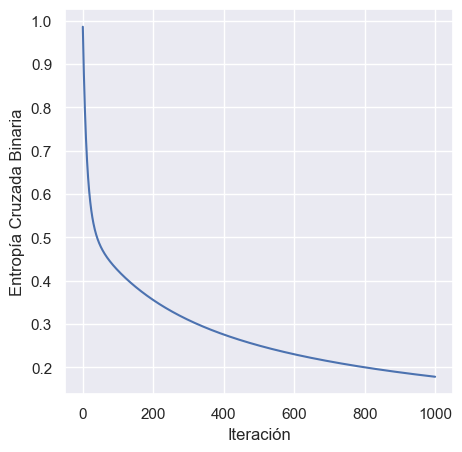

In [31]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(errors)
ax.set_ylabel("Entropía Cruzada Binaria")
ax.set_xlabel("Iteración")
plt.show();

In [27]:
# Probemos a la red
test_1 = net.digital_out(torch.tensor([0., 0, 1]))
test_2 = net.digital_out(torch.tensor([1., 1, 1]))

print(f"Si la entrada es 0, 0, 1, la salida es: {test_1.item()}")
print(f"Si la entrada es 1, 1, 1, la salida es: {test_2.item()}")

Si la entrada es 0, 0, 1, la salida es: 0.0
Si la entrada es 1, 1, 1, la salida es: 1.0


## Perceptron como regresión

Usando un perceptrón, usémoslo en un ejemplo de regresión. Para ello vamos a convertir de Fahrenheit a Celsius. En la vida real, esto no tendría sentido, pero es a modo didáctico.

In [32]:
# Primero definamos la función, que nos devuelva el valor de grado Celsius dado Fahrenheit
def far_to_celsius(farenheit):
    return (farenheit - 32) / 1.8

X_numpy = np.linspace(0, 220, 60000).reshape([-1, 1])
y_numpy = far_to_celsius(X_numpy).reshape([-1, 1])

# Creamos los valores de entrada
X = torch.from_numpy(X_numpy).reshape([-1, 1])
X = X.to(torch.float32)

y = torch.from_numpy(y_numpy).reshape([-1, 1])
y = y.to(torch.float32)

In [33]:
# Creamos el perceptron para regresión
class perceptron(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # En este caso solo nos quedamos con los datos lineales
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(1, 1),
        )
    
    def forward(self, x):

        # Pasamos por el perceptron
        y = self.layers(x)

        return y

In [34]:
y[torch.randperm(X.shape[0])[:10]]

tensor([[54.2143],
        [ 8.9567],
        [60.2685],
        [37.5104],
        [78.7590],
        [67.4431],
        [86.7953],
        [50.9876],
        [34.4792],
        [-9.4441]])

In [35]:
from tqdm import tqdm
# Creamos el perceptron para regresión
net = perceptron()
# Usamos como función de error a MSE
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01) 

# Creamos una lista que mida el error en el loop
errors = list()

# Realizamos la iteración
for epoch in tqdm(range(40000)):

    values = torch.randperm(X.shape[0])

    subsetX = X[values[:50]]
    subsety = y[values[:50]]

    # Limpiamos los gradientes
    optimizer.zero_grad()

    # Obtenemos todas las predicciones
    outputs = net(subsetX)

    # Calculamos el error
    loss = criterion(outputs, subsety)

    # Propagamos el error
    loss.backward()

    # Optimizamos los parámetros
    optimizer.step()

    errors.append(loss.item())

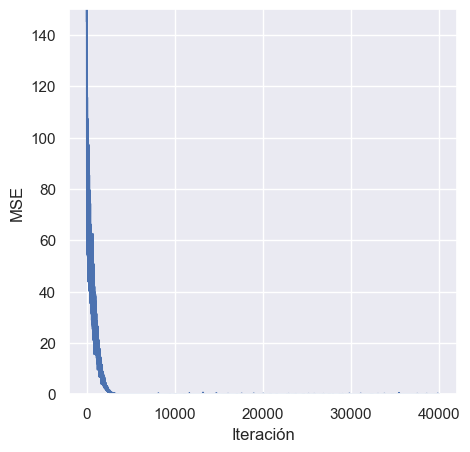

In [36]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(errors)
ax.set_ylabel("MSE")
ax.set_xlabel("Iteración")
ax.set_ylim([0, 150])
plt.show();

In [37]:
# Probemos a la red
test_1 = torch.tensor([[73.4]])
test_1 = test_1.to(torch.float32)
test_2 = torch.tensor([[104]])
test_2 = test_2.to(torch.float32)

print(f"Si tenemos 73.4F, en centígrado según el modelo es: {net(test_1).item()}")
print(f"Si tenemos 73.4F, en centígrado de verdad es: {far_to_celsius(73.4)}")
print(f"Si tenemos 104F, en centígrado según el modelo es: {net(test_2).item()}")
print(f"Si tenemos 104F, en centígrado de verdad es: {far_to_celsius(104)}")

Si tenemos 73.4F, en centígrado según el modelo es: 23.000354766845703
Si tenemos 73.4F, en centígrado de verdad es: 23.000000000000004
Si tenemos 104F, en centígrado según el modelo es: 40.00050354003906
Si tenemos 104F, en centígrado de verdad es: 40.0


## Red Feed-Foward en Heart

Usemos un caso real para probar el modelo, el dataset [**Heart**](https://archive.ics.uci.edu/dataset/45/heart+disease) que usamos anteriormente.

Recordemos que son mediciones de 1025 pacientes, con 13 atributos de variables fisiológicas. Además, contamos con una columna de valores binarios llamada **target** que nos indica si el paciente tiene una enfermedad coronaria o no.

In [38]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Cargamos el dataset
df_heart = pd.read_csv("./Heart.csv")
df_heart.drop_duplicates(inplace=True)

# Hacemos variable dummy a las categóricas
categorical_features = ["cp", "restecg", "slope", "ca", "thal"]
df_heart_dummies = pd.get_dummies(data=df_heart, columns=categorical_features, drop_first=True)

X = df_heart_dummies.drop(columns='target').values
X = X.astype(float)
y = df_heart.iloc[:, -1].values
y = y.astype(float)

# Separamos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

# Convertimos en tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Creamos usando DataLoader los sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [39]:
batch = next(iter(train_loader))

In [40]:
batch

[tensor([[ 50.,   1., 150.,  ...,   0.,   0.,   1.],
         [ 66.,   1., 112.,  ...,   0.,   1.,   0.],
         [ 56.,   1., 120.,  ...,   0.,   0.,   1.],
         ...,
         [ 42.,   1., 130.,  ...,   0.,   1.,   0.],
         [ 66.,   0., 146.,  ...,   0.,   1.,   0.],
         [ 52.,   1., 125.,  ...,   0.,   0.,   1.]]),
 tensor([0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
         0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
         1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
         0., 1., 0., 1., 0., 1., 0., 1., 1., 0.])]

In [57]:
class BinaryNetwork(torch.nn.Module):
    """
    Red neuronal para clasificación binaria.

    Esta red neuronal consiste en múltiples capas totalmente conectadas con normalización por lotes
    y funciones de activación ReLU. La capa de salida utiliza una función de activación sigmoide
    para producir probabilidades de clasificación binaria.

    Args:
        input_size (int): El número de características de entrada.
    """
    def __init__(self, input_size):
        """
        Inicializa el modelo BinaryNetwork.

        Args:
            input_size (int): El número de características de entrada.
        """
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.BatchNorm1d(input_size),
            torch.nn.Linear(input_size, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1)
        )
        
    def forward(self, x):
        """
        Paso hacia adelante a través de la red.
        Args:
            x (torch.Tensor): Tensor de entrada de forma (batch_size, input_size).
        Returns:
            torch.Tensor: Tensor de salida conteniendo probabilidades de clasificación binaria.
        """
        x = self.layers(x)
        return torch.sigmoid(x)  # Escalamos los valores entre 0 y 1

In [69]:
# Inicialización del modelo, función de pérdida y optimizador
input_size = 22 # número de características
model = BinaryNetwork(input_size)

loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

Entrenamos el modelo:

In [70]:
# Bucle de entrenamiento
epochs = 450
max_patience = 5
patience = 0
patience_alpha = 0.001
best_val_loss = np.inf
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(1, epochs + 1):
    #  Entrenamiento
    model.train()  # Establecer el modelo en modo de entrenamiento
    train_loss = 0.0
    for features, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = loss_fn(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * features.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validación
    model.eval()  # Establecer el modelo en modo de evaluación
    val_loss = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for features, targets in val_loader:
            outputs = model(features)
            loss = loss_fn(outputs, targets.unsqueeze(1))
            val_loss += loss.item() * features.size(0)
            val_preds.extend(outputs.round().squeeze().tolist())
            val_targets.extend(targets.tolist())
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)
    
    # Calcula la precisión de la validación
    val_accuracy = accuracy_score(val_targets, val_preds)
    val_accuracies.append(val_accuracy)
    
    # Print estadísticas de entrenamiento/validación
    print(f'Época: {epoch}/{epochs}, Costo de Entrenamiento: {train_loss:.4f}, '
          f'Costo de Validación: {val_loss:.4f}, Exactitud en Validación: {val_accuracy:.4f}')
    
    # Callback early stopping
    if val_loss < best_val_loss*(1-patience_alpha):
        best_val_loss = val_loss
        patience = 0
    else:
        print(f"Validation loss not improved this epoch. Increasing patience counter.")
        patience += 1
        if patience >= max_patience:
            print(f"Max number of iterations without improvement reached. Stopping training.")
            break

Época: 1/450, Costo de Entrenamiento: 0.6847, Costo de Validación: 0.6807, Exactitud en Validación: 0.5600
Época: 2/450, Costo de Entrenamiento: 0.6820, Costo de Validación: 0.6823, Exactitud en Validación: 0.5600
Validation loss not improved this epoch. Increasing patience counter.
Época: 3/450, Costo de Entrenamiento: 0.6822, Costo de Validación: 0.6813, Exactitud en Validación: 0.5600
Validation loss not improved this epoch. Increasing patience counter.
Época: 4/450, Costo de Entrenamiento: 0.6805, Costo de Validación: 0.6819, Exactitud en Validación: 0.5600
Validation loss not improved this epoch. Increasing patience counter.
Época: 5/450, Costo de Entrenamiento: 0.6804, Costo de Validación: 0.6811, Exactitud en Validación: 0.5600
Validation loss not improved this epoch. Increasing patience counter.
Época: 6/450, Costo de Entrenamiento: 0.6805, Costo de Validación: 0.6798, Exactitud en Validación: 0.5600
Época: 7/450, Costo de Entrenamiento: 0.6787, Costo de Validación: 0.6793, Exa

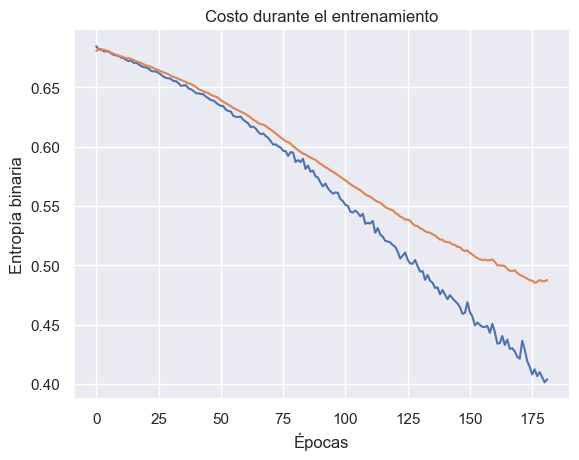

In [71]:
# Graficamos el costo durante el entrenamiento
graph = sns.lineplot(x=[x for x in range(0, epoch)], y=train_losses)
sns.lineplot(x=[x for x in range(0, epoch)], y=val_losses)
graph.set(title="Costo durante el entrenamiento", xlabel='Épocas', ylabel='Entropía binaria')
plt.show()

Evaluamos el modelo con el set de evaluación:

In [49]:
# Evaluamos el modelo
y_pred_list = []
y_pred_proba_list = []
model.eval()
with torch.no_grad():
    for X, y in test_loader:
        y_test_pred = model(X)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag)
        y_pred_proba_list.append(y_test_pred)

# Convertimos a la salida en un solo tensor
y_pred_tensor = torch.cat(y_pred_list).squeeze()
y_pred_proba_tensor = torch.cat(y_pred_proba_list).squeeze()

In [50]:
from sklearn.metrics import f1_score, accuracy_score

print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred_tensor)*100: .0f}%")
print(f"F1-score de testeo fue: {f1_score(y_test, y_pred_tensor)}")

El porcentaje de exactitud es de: 77%
F1-score de testeo fue: 0.7878787878787878


Vemos que obtuvimos un resultado que mejoro cuando lo comparamos con respecto a SVC (0.86) y con respecto al arbol de clasificación (0.76).

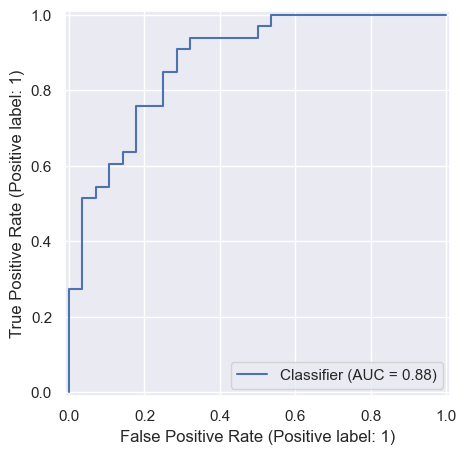

In [65]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_proba_tensor, ax=ax)

plt.show();